In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [81]:
df_train = pd.read_csv('train_data.txt', sep=':::',names=['ID', 'TITLE', 'GENRE','DESCRIPTION'],engine='python')    

In [82]:
x_test = pd.read_csv('test_data.txt', sep=':::',names=['ID', 'TITLE','DESCRIPTION'],engine='python')  

In [83]:
df_test_sol = pd.read_csv('test_data_solution.txt', sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'],engine='python')

In [84]:
df_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [85]:
x_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [86]:
df_test_sol

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [88]:
df_test_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


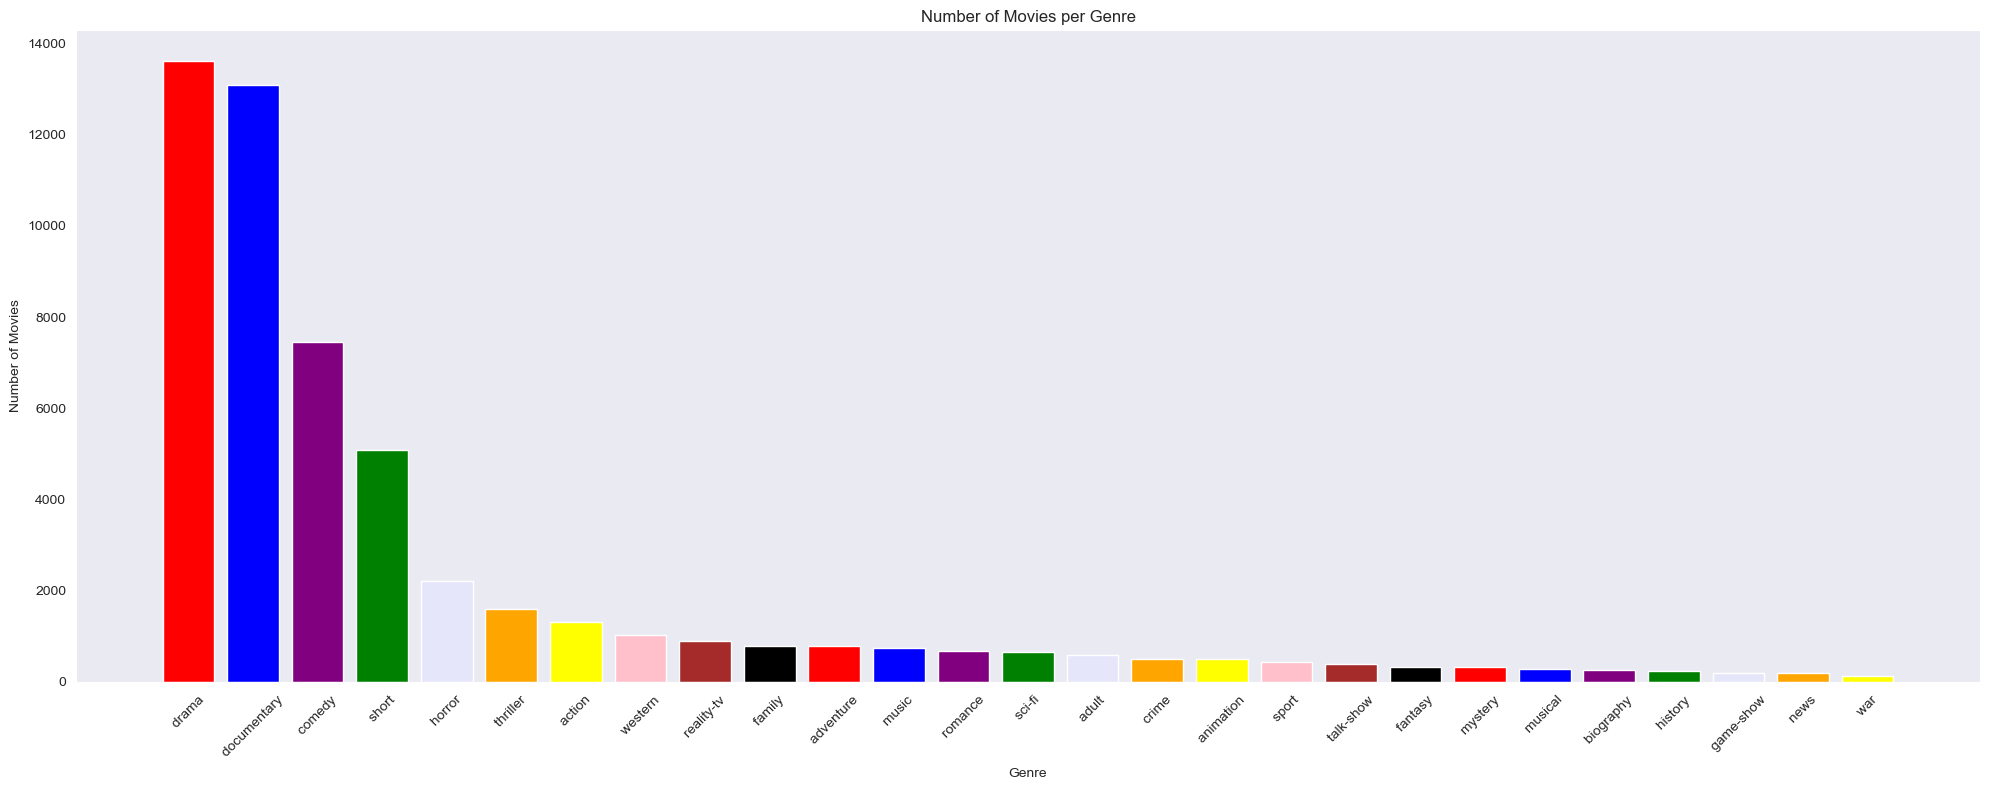

Most watched genre is:  drama 


In [89]:
import matplotlib.pyplot as plt
genre_counts = df_train['GENRE'].value_counts()

plt.figure(figsize=(20,8))
plt.bar(genre_counts.index, genre_counts.values,color=['red', 'blue', 'purple', 'green', 'lavender', 'orange', 'yellow', 'pink', 'brown', 'black'])
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

most_watch_genre = genre_counts.idxmax()
print('Most watched genre is:', most_watch_genre)

In [90]:
df_train = df_train.drop(columns=['ID'],axis=1)
x_test = x_test.drop(columns=['ID'],axis=1)

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['GENRE'] = le.fit_transform(df_train['GENRE'])
df_test_sol['GENRE'] = le.transform(df_test_sol['GENRE'])

In [92]:
df_train['combined_text'] = df_train['TITLE'] + ' ' + df_train['DESCRIPTION']
x_test['combined_text'] = x_test['TITLE'] + ' ' + x_test['DESCRIPTION']

In [93]:
X_train = df_train.drop(['GENRE','DESCRIPTION','TITLE'],axis=1)

X_test = x_test.drop(['DESCRIPTION','TITLE'],axis=1)

In [94]:
y_train = df_train['GENRE']
y_test = df_test_sol['GENRE']

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_vectorizer.fit(X_train['combined_text'])

X_train = tfidf_vectorizer.transform(X_train['combined_text'])
X_test = tfidf_vectorizer.transform(X_test['combined_text'])

In [96]:
from sklearn.model_selection import train_test_split

x_train,x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [97]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

In [98]:
log_model = LogisticRegression(C = 1)
log_model.fit(x_train, y_train)

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [99]:
y_train_pred1 = log_model.predict(x_train)
print(classification_report(y_train, y_train_pred1))

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.79      0.43      0.56      1199
           1       0.91      0.41      0.57       531
           2       0.88      0.26      0.40       702
           3       0.94      0.11      0.20       437
           4       0.00      0.00      0.00       238
           5       0.73      0.81      0.77      6694
           6       0.77      0.06      0.11       449
           7       0.74      0.95      0.83     11773
           8       0.66      0.92      0.77     12262
           9       0.80      0.16      0.27       720
          10       0.88      0.02      0.05       286
          11       0.96      0.51      0.66       176
          12       0.00      0.00      0.00       219
          13       0.83      0.76      0.79      1996
          14       0.88      0.52      0.65       651
          15       0.91      0.04      0.07       256
          16       1.00      0.02      0.04       291
          17       0.82    

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
y_val_pred1 = log_model.predict(x_val)
print(classification_report(y_val, y_val_pred1))

              precision    recall  f1-score   support

           0       0.54      0.26      0.35       116
           1       0.78      0.31      0.44        59
           2       0.23      0.04      0.07        73
           3       1.00      0.02      0.03        61
           4       0.00      0.00      0.00        27
           5       0.55      0.58      0.56       753
           6       0.00      0.00      0.00        56
           7       0.65      0.85      0.74      1323
           8       0.52      0.82      0.64      1351
           9       0.42      0.08      0.13        64
          10       0.00      0.00      0.00        37
          11       1.00      0.28      0.43        18
          12       0.00      0.00      0.00        24
          13       0.74      0.61      0.67       208
          14       0.69      0.36      0.48        80
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        28
          17       0.00    

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
y_test_pred1 = log_model.predict(X_test)
print(classification_report(y_test, y_test_pred1))

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.27      0.36      1314
           1       0.61      0.19      0.29       590
           2       0.68      0.16      0.26       775
           3       0.80      0.02      0.03       498
           4       0.00      0.00      0.00       264
           5       0.56      0.58      0.57      7446
           6       0.40      0.02      0.04       505
           7       0.65      0.87      0.75     13096
           8       0.53      0.81      0.64     13612
           9       0.50      0.08      0.13       783
          10       1.00      0.01      0.01       322
          11       0.91      0.45      0.60       193
          12       0.00      0.00      0.00       243
          13       0.67      0.56      0.61      2204
          14       0.72      0.38      0.50       731
          15       0.67      0.01      0.01       276
          16       1.00      0.00      0.01       318
          17       0.73    

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(penalty='l2', C=0.1,dual = False)
svc_model.fit(x_train, y_train)

LinearSVC(C=0.1, dual=False)

In [103]:
y_train_pred2 = svc_model.predict(x_train)
print(classification_report(y_train, y_train_pred2))


              precision    recall  f1-score   support

           0       0.89      0.51      0.65      1199
           1       0.97      0.58      0.73       531
           2       0.94      0.38      0.54       702
           3       0.98      0.38      0.55       437
           4       1.00      0.00      0.01       238
           5       0.75      0.78      0.76      6694
           6       0.99      0.16      0.27       449
           7       0.74      0.95      0.83     11773
           8       0.66      0.91      0.77     12262
           9       0.94      0.25      0.40       720
          10       0.97      0.22      0.36       286
          11       0.95      0.80      0.87       176
          12       1.00      0.00      0.01       219
          13       0.81      0.83      0.82      1996
          14       0.91      0.66      0.77       651
          15       0.98      0.16      0.28       256
          16       1.00      0.15      0.26       291
          17       0.92    

In [104]:
y_val_pred2 = svc_model.predict(x_val)
print(classification_report(y_val, y_val_pred2))

              precision    recall  f1-score   support

           0       0.59      0.26      0.36       116
           1       0.83      0.34      0.48        59
           2       0.47      0.11      0.18        73
           3       0.80      0.07      0.12        61
           4       0.00      0.00      0.00        27
           5       0.54      0.57      0.55       753
           6       0.00      0.00      0.00        56
           7       0.64      0.87      0.74      1323
           8       0.53      0.81      0.64      1351
           9       0.60      0.09      0.16        64
          10       0.50      0.03      0.05        37
          11       0.86      0.67      0.75        18
          12       0.00      0.00      0.00        24
          13       0.67      0.64      0.66       208
          14       0.69      0.42      0.53        80
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        28
          17       0.00    

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
y_test_pred2 = svc_model.predict(X_test)
print(classification_report(y_test, y_test_pred2))

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.25      0.34      1314
           1       0.69      0.23      0.35       590
           2       0.71      0.18      0.29       775
           3       0.62      0.03      0.06       498
           4       0.00      0.00      0.00       264
           5       0.56      0.56      0.56      7446
           6       0.55      0.01      0.02       505
           7       0.64      0.89      0.74     13096
           8       0.54      0.80      0.64     13612
           9       0.55      0.07      0.12       783
          10       0.58      0.02      0.04       322
          11       0.85      0.59      0.69       193
          12       0.00      0.00      0.00       243
          13       0.63      0.62      0.63      2204
          14       0.67      0.40      0.50       731
          15       0.50      0.01      0.01       276
          16       0.00      0.00      0.00       318
          17       0.80    

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def predict_genre(title,description,model,vectorizer,label_encoder):
    
    data = pd.DataFrame({'TITLE':[title],'DESCRIPTION':[description]})
    data['combined_text'] = data['TITLE'] + ' ' + data['DESCRIPTION']
    X_new = vectorizer.transform(data['combined_text'])
    y_pred = model.predict(X_new)
    predict_genre = label_encoder.inverse_transform(y_pred)[0]
    return predict_genre

In [113]:

predict_genre("Young, Wild and Wonderful (1980) "," As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the fantasies in the most erotic and uncommon ways. One slips off to the curator's office for a little acquisition.  Another finds the anthropologist to see what bones can be identified. Even the head teacher isn't immune. Soon the tour is over, but as the bus departs, everyone admits it was quite an education.",svc_model,tfidf_vectorizer,label_encoder=le)

' adult '